# Detección de Rostros con OpenCV
### Percepción Computacional - Universidad de los Hemisferios
#### Maestría en Inteligencia Artificial Aplicada

¡Bienvenidos al Notebook de Detección de Rostros con OpenCV! Aquí encontrarás todo lo que necesitas para aprender a detectar rostros en imágenes y en tiempo real utilizando la potente biblioteca OpenCV y su `CascadeClassifier`. Esta herramienta es esencial para la percepción computacional y te proporcionará habilidades clave en el procesamiento de imágenes.

### Contenido del Notebook

En este Notebook, encontrarás:

- Celdas interactivas que te guiarán a través de los conceptos fundamentales de la detección de rostros.
- Script de código para detectar rostros en imágenes estáticas.
- Script de código para detectar rostros en tiempo real usando la cámara web de tu computadora.
- Recursos útiles, para facilitar tu aprendizaje y experimentación.

### Cómo Empezar

1. Lee el Notebook para explorar los fundamentos de la detección de rostros.
2. Prueba el código de muestra en tus propias imágenes para ver cómo funciona.
3. ¡Sumérgete en la detección de rostros en tiempo real y observa cómo puedes aplicar esta tecnología en situaciones cotidianas!

### Comunidad

Si tienes alguna pregunta, idea o deseas compartir tus propias experiencias en la detección de rostros, no dudes en utilizar la sección de "Issues" en este repositorio para interactuar con nuestra comunidad de estudiantes y entusiastas.

¡Vamos a descubrir juntos el apasionante mundo de la detección de rostros!

Eugenio.

## 1. Detección de rostros en imágenes estáticas

In [1]:
# Instalar OpenCV y Matplotlib si aún no están instalados
!pip install opencv-python
!pip install matplotlib

In [1]:
# Importar las bibliotecas necesarias
import cv2
import matplotlib.pyplot as plt

In [2]:
# Definir la ruta de la imagen de entrada
imagePath = './input-image2.jpeg'

# Leer la imagen de entrada
img = cv2.imread(imagePath)

In [3]:
# Mostrar la forma (shape) de la imagen
# Esto proporciona información sobre las dimensiones de la imagen
img.shape

(1068, 1600, 3)

In [4]:
# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mostrar la forma (shape) de la imagen en escala de grises
gray_image.shape

(1068, 1600)

(-0.5, 1599.5, 1067.5, -0.5)

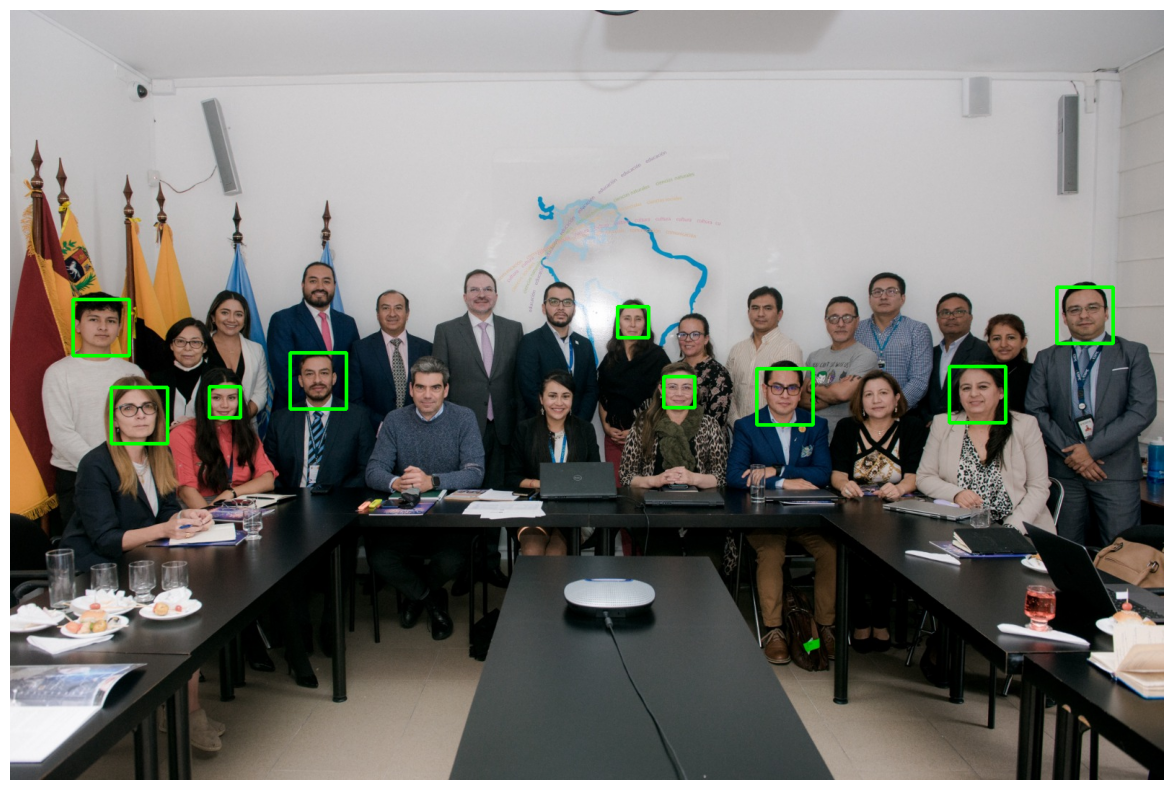

In [18]:
img = cv2.imread(imagePath)
# Cargar un clasificador pre-entrenado para la detección de caras
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

# Detectar caras en la imagen en escala de grises
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.8, minNeighbors=5, minSize=(40, 40)
)

# Dibujar rectángulos alrededor de las caras detectadas
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

# Convertir la imagen al formato RGB para mostrarla con Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Crear una figura de Matplotlib para mostrar la imagen
plt.figure(figsize=(20,10)) # Configuramos el tamaño de la figura
plt.imshow(img_rgb) # Mostramos la imagen en la figura
plt.axis('off') # No dibujamos los ejes de la figura

(-0.5, 1599.5, 1067.5, -0.5)

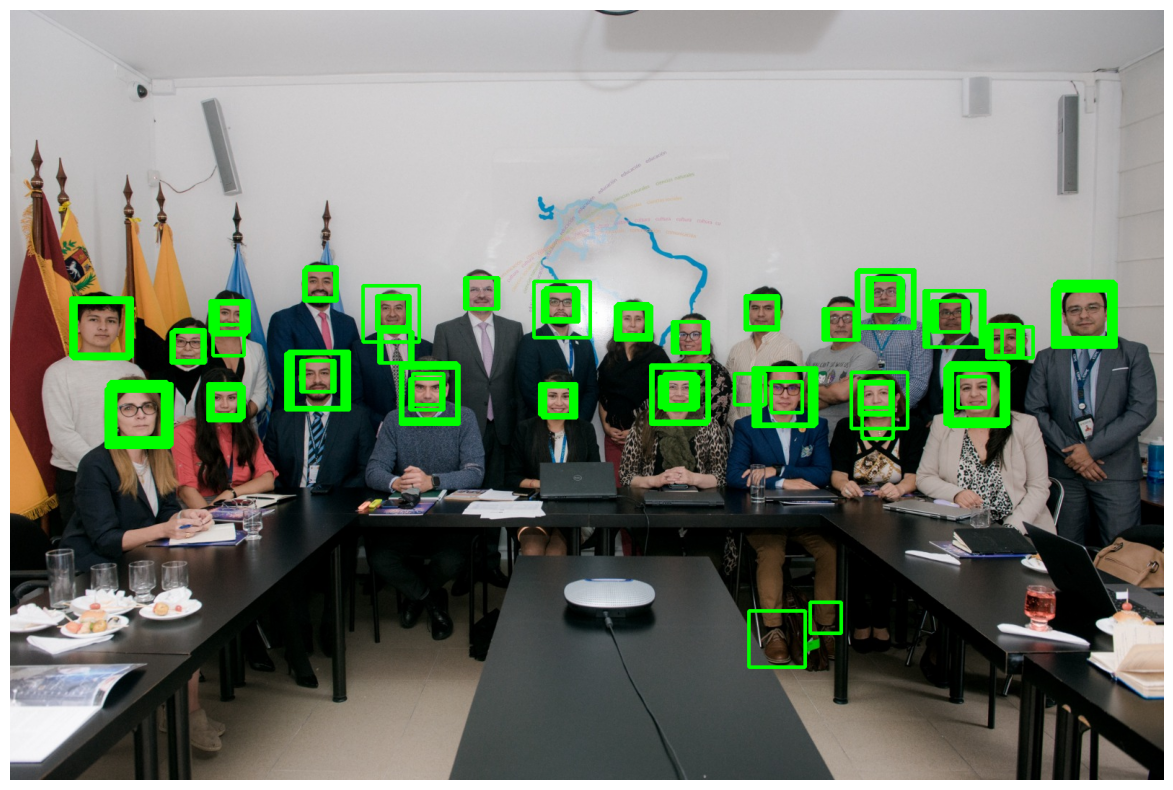

## 2. Detección de rostros en video

In [34]:
# Inicializar un objeto de captura de video desde la cámara predeterminada (normalmente la webcam)
video_capture = cv2.VideoCapture(0)

In [35]:
# Definir una función para detectar y dibujar recuadros alrededor de las caras en un fotograma de video
def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
    return faces

In [36]:
# Bucle continuo para procesar los fotogramas de video
while True:
    # Leer un fotograma de la captura de video
    result, video_frame = video_capture.read()
    
    # Finalizar el bucle si el fotograma no se lee correctamente
    if result is False:
        break 

    # Detectar caras en el fotograma de video y dibujar cajas limitantes
    faces = detect_bounding_box(video_frame)

    # Mostrar el fotograma procesado en una ventana llamada "Mi Proyecto de Detección de Caras"
    cv2.imshow(
        "Mi Proyecto de Detección de Caras", video_frame
    )

    # Finalizar el bucle si se presiona la tecla 'q'
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Liberar el objeto de captura de video y cerrar todas las ventanas de OpenCV
video_capture.release()
cv2.destroyAllWindows()